
# COGS 189: Depression

## Overview
In this project, we ______________.<br>

### EEG Data
For this dataset, we will be using data collected from James F. Cavanagh & John J.B.Allen's Depression Rest (d003) located at the following URL: http://predict.cs.unm.edu/downloads.php.
<br>
***
## Section 1: Setup
We will be importing the following packages: <br>
- numpy
- scipy
- matplotlib
- seaborn
- pandas

In [1]:
import numpy as np                                      # for dealing with data
from scipy.signal import butter, sosfiltfilt, sosfreqz  # for filtering
from scipy.io import loadmat                            # for importing matlab files
import matplotlib.pyplot as plt                         # for plotting
import seaborn as sns                                   # for visualization
import pandas as pd                                     # for importing datasets and handling data

Since each column in the EEG data corresponds to the columns in EEG times, we will use times_df as the column labels for data_df.

In [2]:
num = '581'
data_t = pd.read_csv('Data/' + num +'_data.csv')
channels = pd.read_csv('Data/' + num + 'c.csv')
events = pd.read_csv('Data/' + num + 'e.csv')
events['type'] = events['type'].astype(str)

In [3]:
data_t

,0,2,4,6,8,10,12,14,16,18,...,533480,533482,533484,533486,533488,533490,533492,533494,533496,533498
0,-22.067210,-23.904130,-28.987280,-29.649160,-25.700130,-23.452060,-23.818880,-23.578080,-22.337660,-20.762730,...,0,0,0,2.534828,0.010972,719.061,0.000000,0.000148,16.311660,116604.5000
1,-1.028254,-1.463279,-7.097401,-9.161324,-5.729756,-2.985125,-2.519705,-1.917431,-0.435025,1.093048,...,0,0,0,7.431306,0.010972,719.061,0.010972,719.061000,0.000000,0.0000
2,-2.210561,-1.724235,-8.046034,-11.219020,-7.179543,-2.948799,-1.980298,-1.740248,0.583147,2.640100,...,0,0,0,2.572786,-157649.300000,0.000,0.010972,719.061000,0.010972,194.3408


In [4]:
eyes_closed = ['1', '3', '5']
eyes_open = ['2', '4', '6']
fs = 500
epoch_s = 0
epoch_e = 500

In [5]:
#Get relevent data from events
#TAs code

#eyes closed
dataset_closed_0 = []
dataset_closed_1 = []
dataset_closed_2 = []

for e in range(1, len(events)):
    if events['type'][e] in eyes_closed:
        time = int(events['latency'][e])
        if time % 2 == 1:
            time = time + 1
        
        time_end = time
        loc_1 = data_t.columns.get_loc(str(time))
        
        dataset_closed_0.append(data_t.iloc[0, loc_1])
        dataset_closed_1.append(data_t.iloc[1, loc_1])
        dataset_closed_2.append(data_t.iloc[2, loc_1])

#eyes open
dataset_open_0 = []
dataset_open_1 = []
dataset_open_2 = []

for e in range(1, len(events)):
    if events['type'][e] in eyes_open:
        time = int(events['latency'][e])
        if time % 2 == 1:
            time = time + 1
        
        time_end = time + 250
        loc_1 = data_t.columns.get_loc(str(time))
        
        dataset_open_0.append(data_t.iloc[0, loc_1])
        dataset_open_1.append(data_t.iloc[1, loc_1])
        dataset_open_2.append(data_t.iloc[2, loc_1])

In [6]:
#Convert to df

closed_0 = pd.DataFrame(np.array(dataset_closed_0))
closed_1 = pd.DataFrame(np.array(dataset_closed_1))
closed_2 = pd.DataFrame(np.array(dataset_closed_2))

open_0 = pd.DataFrame(np.array(dataset_open_0))
open_1 = pd.DataFrame(np.array(dataset_open_1))
open_2 = pd.DataFrame(np.array(dataset_open_2))

In [7]:
#get the mean for the events

closed0 = closed_0
closed1 = closed_1
closed2 = closed_2

open0 = open_0
open1 = open_1
open2 = open_2

In [8]:
closed0 = np.transpose(closed0)
closed1 = np.transpose(closed1)
closed2 = np.transpose(closed2)

open0 = np.transpose(open0)
open1 = np.transpose(open1)
open2 = np.transpose(open2)

In [9]:
#combine O1, Oz, O2

temp = pd.concat([closed0,closed1],ignore_index=True)
closed_data = pd.concat([temp,closed2],ignore_index=True)

temp = pd.concat([open0,open1],ignore_index=True)
open_data = pd.concat([temp,open2],ignore_index=True)

In [10]:
closed_data

,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
0,-46.48703,-41.46823,-14.501420,-36.75130,-52.28514,-57.12468,-55.14438,-64.45175,-39.60669,-39.70470,...,-23.265680,-22.182120,-14.161140,-16.936170,-23.62020,-12.945180,-10.758490,0.833872,-11.666500,-15.928380
1,-31.18405,-28.67755,-1.864350,-24.70880,-45.01515,-44.18765,-40.55429,-55.83339,-31.07908,-30.06239,...,-7.068192,-9.852411,-0.063756,-5.875803,-12.59096,-5.197021,-2.943609,12.919530,-5.492524,-5.346774
2,-40.18717,-33.34435,-7.690927,-29.43298,-48.43426,-48.88041,-39.99086,-52.85612,-32.22877,-28.45336,...,-3.352687,-9.093119,1.791105,-2.612077,-10.76116,-0.352735,-4.697054,15.837780,-0.551862,-5.291321


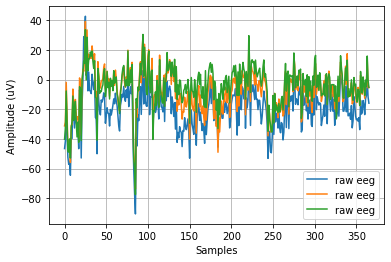

In [11]:
#Closed Eyes
a = np.transpose(closed_data)
plt.plot(a, label = "raw eeg");
plt.xlabel('Samples');
plt.ylabel('Amplitude (uV)');
plt.grid(True);
plt.legend(loc = 'best');

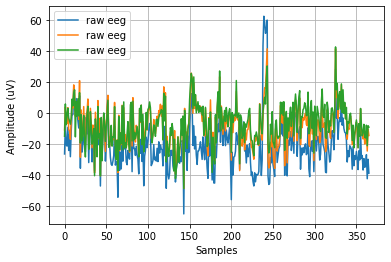

In [12]:
#Open Eyes
a = np.transpose(open_data)
plt.plot(a, label = "raw eeg");
plt.xlabel('Samples');
plt.ylabel('Amplitude (uV)');
plt.grid(True);
plt.legend(loc = 'best');

In [13]:
data = closed_data.mean()

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)


# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the max of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands: 
    try:
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq < eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
    except ValueError:  #raised if `y` is empty.
        print("entered")
        pass

data = open_data.mean()

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)


# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the max of the fft amplitude for each EEG band
eeg_band_fft_open = dict()
for band in eeg_bands: 
    try:
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq < eeg_bands[band][1]))[0]
        eeg_band_fft_open[band] = np.mean(fft_vals[freq_ix])
    except ValueError:  #raised if `y` is empty.
        print("entered")
        pass



In [14]:
eeg_band_fft

{'Delta': 1531.26512396621,
 'Theta': 618.9431297754194,
 'Alpha': 663.4815841978076,
 'Beta': 435.11185635000834,
 'Gamma': 344.78465255831986}

In [15]:
eeg_band_fft_open

{'Delta': 1759.4990637464546,
 'Theta': 310.085827814641,
 'Alpha': 588.8439572520829,
 'Beta': 411.5075546002952,
 'Gamma': 178.01534899172339}

Text(0, 0.5, 'Mean band Amplitude')

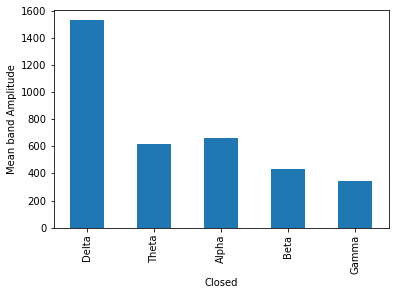

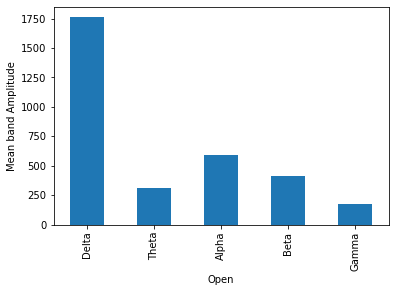

In [16]:
# Plot the data 
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("Closed")
ax.set_ylabel("Mean band Amplitude")

df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft_open[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("Open")
ax.set_ylabel("Mean band Amplitude")

In [17]:
closed_a = eeg_band_fft['Alpha']
open_a = eeg_band_fft_open['Alpha']
depressed = 0
df = pd.DataFrame([open_a, closed_a, depressed])
df = np.transpose(df)
df.columns=['open_alpha', 'closed_alpha', 'depressed']
df

,open_alpha,closed_alpha,depressed
0,588.843957,663.481584,0.0
